In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/CHD.csv')

In [3]:
df.head()

,CensusTract,CHD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,5.9,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,7.1,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,7.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,6.4,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,7.9,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [4]:
df.set_index('CensusTract', inplace=True)
df.head()


,CHD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,5.9,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,7.1,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,7.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,6.4,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,7.9,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


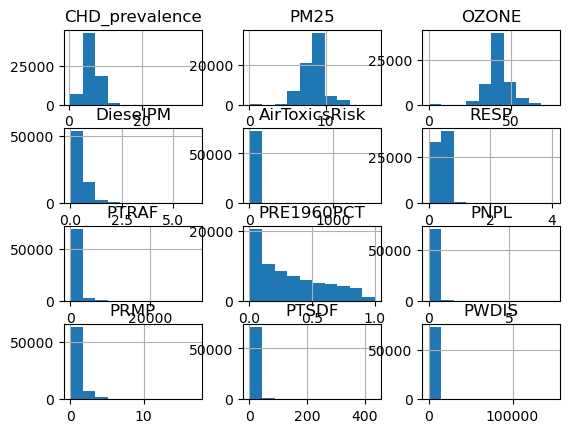

In [5]:
df.hist()
plt.show()

In [6]:
X = df.copy()
X.drop('CHD_prevalence', axis=1, inplace=True)
y = df['CHD_prevalence']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54242, 11) (54242,)
(18081, 11) (18081,)


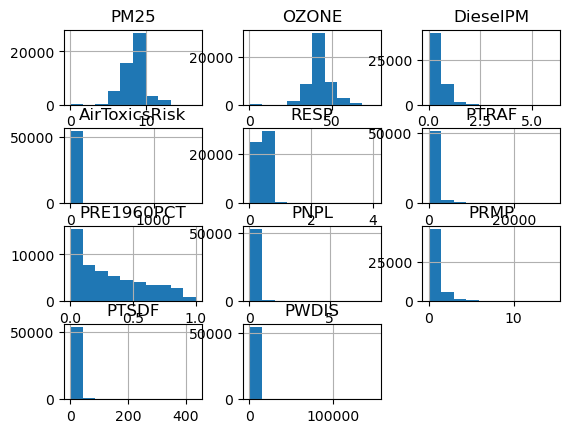

In [9]:
X_train.hist()
plt.show()

In [10]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
32003002961,7.020828,55.534960,0.707527,33.105706,0.500187,486.697724,0.025327,0.004882,0.247426,2.158112,0.000320
18097310204,9.312653,44.314528,0.672713,29.201408,0.403984,291.741826,0.063946,0.109321,1.963273,3.805254,0.000000
48453001308,9.493040,41.367930,0.583178,33.950504,0.445061,1831.637602,0.218243,0.013989,0.588443,2.407028,0.000001
15009030301,0.000000,0.000000,0.011847,8.431591,0.083764,20.472961,0.168402,0.005390,0.178587,0.254276,0.000000
6111000200,8.453749,57.221836,0.152667,31.823667,0.477272,331.674424,0.359829,0.105408,0.400620,0.071656,0.930880


In [11]:
# Saving data without normalization
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_CHD')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_CHD')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_CHD')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_CHD')

In [12]:
# Taking the log of the data in X_train that are not close to being normally distributed
X_train_log = X_train.copy()

pt = PowerTransformer()
pt.fit(X_train_log[['DieselPM']])
X_train_log['DieselPM'] = pt.transform(X_train_log[['DieselPM']])

pt1 = PowerTransformer()
pt1.fit(X_train_log[['AirToxicsRisk']])
X_train_log['AirToxicsRisk'] = pt1.transform(X_train_log[['AirToxicsRisk']])

pt2 = PowerTransformer()
pt2.fit(X_train_log[['RESP']])
X_train_log['RESP'] = pt2.transform(X_train_log[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train_log[['PTRAF']])
X_train_log['PTRAF'] = pt3.transform(X_train_log[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train_log[['PRE1960PCT']])
X_train_log['PRE1960PCT'] = pt4.transform(X_train_log[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train_log[['PNPL']])
X_train_log['PNPL'] = pt5.transform(X_train_log[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train[['PRMP']])
X_train['PRMP'] = pt6.transform(X_train[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train_log[['PTSDF']])
X_train_log['PTSDF'] = pt7.transform(X_train_log[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train_log[['PWDIS']])
X_train_log['PWDIS'] = pt8.transform(X_train_log[['PWDIS']])

pt9 = PowerTransformer()

y_train_log = y_train.copy()
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.reshape(-1,1)
pt9.fit(y_train_log)
y_train_log = pt9.transform(y_train_log)
y_train_log = np.ravel(y_train_log)

In [13]:
print(X_train_log.shape, y_train_log.shape)

(54242, 11) (54242,)


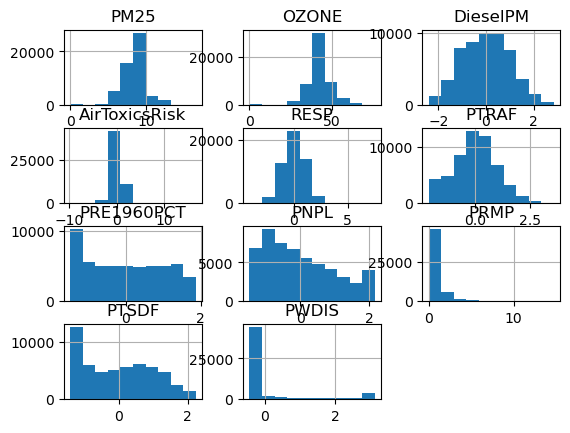

In [14]:
X_train_log.hist()
plt.show()

PWDIS should just be left out of the data since it is not normally distributed

In [15]:
X_test_log = X_test.copy()

In [16]:
X_train_log.drop('PWDIS', axis=1, inplace=True)
X_test_log.drop('PWDIS', axis=1, inplace=True)

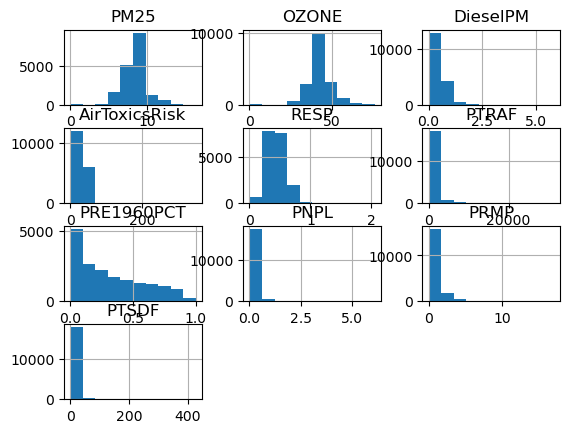

In [17]:
X_test_log.hist()
plt.show()

In [19]:
# Transforming the test data using the PowerTransformer that I fit on the train data
X_test_log['DieselPM'] = pt.transform(X_test_log[['DieselPM']])

X_test_log['AirToxicsRisk'] = pt1.transform(X_test_log[['AirToxicsRisk']])

X_test_log['RESP'] = pt2.transform(X_test_log[['RESP']]) 

X_test_log['PTRAF'] = pt3.transform(X_test_log[['PTRAF']])

X_test_log['PRE1960PCT'] = pt4.transform(X_test_log[['PRE1960PCT']])

X_test_log['PNPL'] = pt5.transform(X_test_log[['PNPL']])

X_test_log['PRMP'] = pt6.transform(X_test_log[['PRMP']])

X_test_log['PTSDF'] = pt7.transform(X_test_log[['PTSDF']])


y_test_log = y_test.copy()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.reshape(-1,1)
y_test_log = pt9.transform(y_test_log)
y_test_log = y_test_log.reshape(18081,)
y_test_log.shape

(18081,)

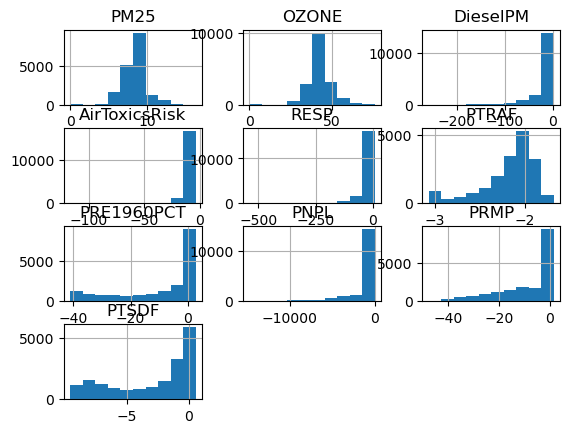

In [20]:
X_test_log.hist()
plt.show()

In [21]:
# Saving normalized data
X_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_CHD')
X_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_CHD')

y_test_log = pd.Series(y_test_log)
y_train_log = pd.Series(y_train_log)
y_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_CHD')
y_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_CHD')